### The Spark Foundation - GRIP - DATA SCIENCE AND BUSINESS ANALYTICS Intern

Author : Nabin Adhikari

TASK 6:  Create the Decision Tree classifier and visualize it graphically.



#### Dataset used: Iris dataset, which is available in sklearn library. 

* Iris dataset link - https://bit.ly/2TK5Xn5



#### Problem Statement : 
* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

### Importing necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [9]:
#LOADING DATA INTO THE ENVIRONMENT

df=pd.read_csv("Iris.csv")
print(df)
print("Data Imported!!")

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [10]:
df.shape

(150, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
df.isnull().sum()   # check for nulls 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
df.duplicated().sum()

0

### DATA VISUALIZATION:

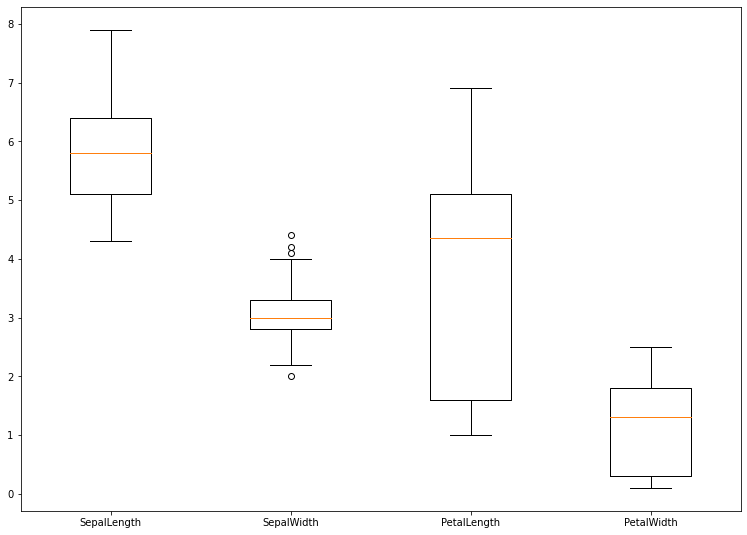

In [22]:
fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])


# Creating plot
bp = ax.boxplot(df.drop(["Species","Id"],axis=1))

ax.set_xticklabels(['SepalLength', 'SepalWidth', 
                    'PetalLength', 'PetalWidth'])
  
# show plot
plt.show()

In [23]:
## Treating outliers present in the SepalWidthCm column

q1,q3 = np.percentile(df['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)

c:\users\nabin adhikari\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


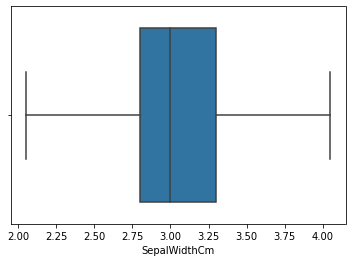

In [24]:
sns.boxplot(df['SepalWidthCm']);

C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASHISH YENKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

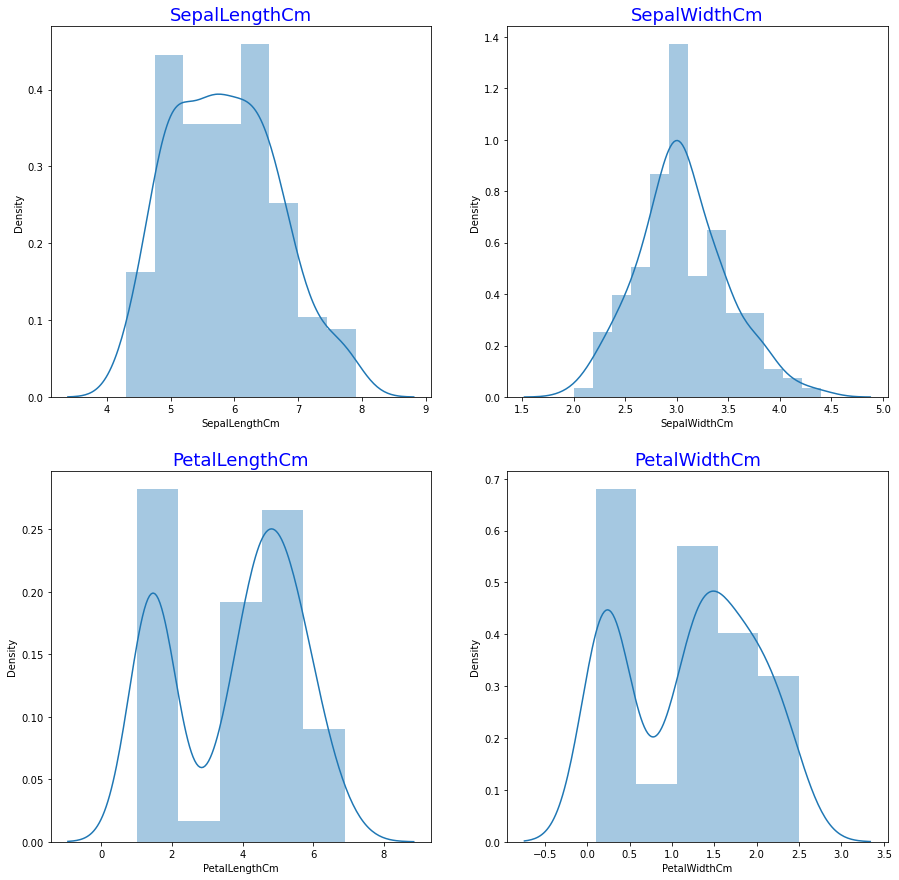

In [6]:
fig=plt.figure(figsize=(15,15))
for i in range(1,5):
    ax=fig.add_subplot(2,2,i)
    sns.distplot(df[df.columns[i]])
    ax.set_title(df.columns[i],color='blue',fontsize=18)
plt.show()

### DATA INSPECTION:

In [27]:
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()
df["Target"]=encode.fit_transform(df["Species"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Target         150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


### DATA BUILDING:

In [28]:
X=df.drop(["Species","Id","Target"],axis=1)
y=df["Target"]

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.35,random_state=2021)
print(df.shape)
print("X_train shape=",X_train.shape)
print("Y_train shape=",Y_train.shape)
print("X_test shape=",X_test.shape)
print("Y_test shape=",Y_test.shape)

(150, 7)
X_train shape= (97, 4)
Y_train shape= (97,)
X_test shape= (53, 4)
Y_test shape= (53,)


### BUILDING MODEL:

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### DECISION TREE: 

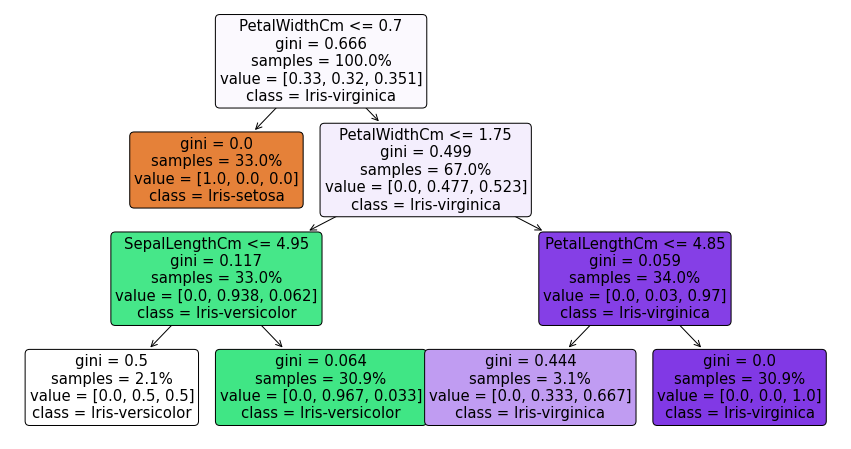

In [31]:
from sklearn import tree

FeatureNames=['SepalLengthCm', 'SepalWidthCm', 
                    'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize = (15,8))
tree.plot_tree(dtree, feature_names= FeatureNames , class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
               filled = True, precision = 3,proportion =True, rounded = True)
plt.show()

### PREDICTION:

In [32]:
y_pred=dtree.predict(X_test)
print(y_pred)
print('Iris-setosa=0 , Iris-versicolor=1, Iris-virginica=2')

[0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 1 0 1 1 1 1 0 0 1 1 0 2 1 1 2
 0 2 1 2 2 0 1 1 1 2 2 1 1 2 0 2]
Iris-setosa=0 , Iris-versicolor=1, Iris-virginica=2


### EVALUATING MODEL:

In [33]:
print("TESTING ACCURACY OF DECISION TREE MODEL={}%".format(round(dtree.score(X_test,Y_test)*100,2)))

TESTING ACCURACY OF DECISION TREE MODEL=94.34%


In [34]:
from sklearn import metrics  
print('Mean Absolute Error:{}%'.format(round(metrics.mean_absolute_error(Y_test, y_pred)*100,3)))

Mean Absolute Error:5.66%


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_pred,Y_test)
cm

array([[18,  0,  0],
       [ 0, 19,  3],
       [ 0,  0, 13]], dtype=int64)

In [40]:
accuracy_score(y_pred,Y_test)

0.9433962264150944